### BA Final Group Project 
#### Group Member: Yunpeng Hou | Yihuan He | Tianzi Zheng | Ziqing Li | Lifu Sun | Jesus Alejandro Garza

#                  Human Resources & Workforce Allocation Analysis

### Brief Description: 
### A HR company has demographic data about people who are looking for a job, and what position they end up having, with what salary and how long does it take for them to get the job

### Problem Statements: 
### Can we predict what might their wages be, what's their position, their education or how long will it take for them to get hired based on the information that we already have?
### By solving above problems, we can minimize the resources of HR company spent in matching candidates with the right job and salary.

### Project Structure
Data Cleaning: BA

Data Filtering:  FT & PT

1. Descriptive Data Mining           
      1.1 Data Visualization                    
      1.2 K-Means
      

2. Predictive Data Mining                         

    2.1 Prediction for Numerical Data                   
      2.1.1 Full-Time DayDiff & Part-Time DayDiff
         2.1.1 a) Linear Regression

      2.1.2  Full-Time TotalWages 
         2.1.2 a) Linear Regression
         2.1.2 b) Regression Tree
             
      2.1.3  Part-Time TotalWages
         2.1.3 a) Linear Regression
         2.1.3 b) Regression Tree
         

    2.2 Prediction for Categorical Data                                
      2.2.1 Full-Time Education                                                      
         2.2.1 a) Logistic Regression                                                                  
         2.2.1 b) K-Nearest Neighbors
         2.2.1 c) Classification Tree
         2.2.1 d) Random Forest          

      2.2.2 Part-Time Position
         2.2.2 a) Logistic Regression
         2.2.2 b) K-Nearest Neighbors
         2.2.2 c) Classification Tree
         2.2.2 d) Random Forest

3. Overall Conclusion           
      3.1 Numerical Data - Regression                    
      3.2 Categorical Data - Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BA = pd.read_csv('Employment_Now_Data.csv')

In [3]:
BA

PID  AGE  GENDER  ZIP CODE               COUNTY  \
0      PID02994   29    male     11692              Arverne   
1      PID00542   50    male     10456                Bronx   
2      PID03451   50    male     11420     South Ozone Park   
3      PID00543   50    male     10456                Bronx   
4      PID11335   40    male     11220             Brooklyn   
5      PID05307   26    male     11693         Far Rockaway   
6      PID05308   26    male     11693         Far Rockaway   
7      PID15814   33    male     11413  Springfield Gardens   
8      PID17406   22  female     11691         Far Rockaway   
9      PID01003   31  female     11433              Jamaica   
10     PID00547   38  female     11216             Brooklyn   
11     PID01004   31  female     11433              Jamaica   
12     PID15261   30  female     11226             Brooklyn   
13     PID16399   48    male     11691         Far Rockaway   
14     PID06715   27  female     11233             Brooklyn   
15     PID00482   23  female     11212             Brooklyn   
16     PID15263   28    male     11691         Far Rockaway   
17     PID15264   28    male     11691         Far Rockaway   
18     PID04900   30  female     11229             Brooklyn   
19     PID19785   26  female     11233             Brooklyn   
20     PID19793   39  female     11221             Brooklyn   
21     PID03444   37  female     11417           Ozone Park   
22     PID06596   45  female     11233             Brooklyn   
23     PID05160   51    male     11226             Brooklyn   
24     PID11398   33    male     11412         Saint Albans   
25     PID00680   43    male     11208             Brooklyn   
26     PID17685   27  female     11203             Brooklyn   
27     PID13957   25  female     11206             Brooklyn   
28     PID02806   35    male     11692              Arverne   
29     PID01814   51    male     11226             Brooklyn   
...         ...  ...     ...       ...                  ...   
19859  PID09678   57    male     11236             Brooklyn   
19860  PID14529   31  female     11238             Brooklyn   
19861  PID07070   34  female     11204             Brooklyn   
19862  PID01449   50    male     11691         Far Rockaway   
19863  PID08438   20    male     10467                Bronx   
19864  PID08436   44    male     11226             Brooklyn   
19865  PID13258   35  female     11233             Brooklyn   
19866  PID13752   45    male     12226               Albany   
19867  PID14246   40  female     10469                Bronx   
19868  PID01446   42  female     11230             Brooklyn   
19869  PID01563   37  female     11207             Brooklyn   
19870  PID02763   53    male     11216             Brooklyn   
19871  PID18457   49    male     11201             Brooklyn   
19872  PID13252   56    male     11212             Brooklyn   
19873  PID15800   26    male     11236             Brooklyn   
19874  PID02230   30  female     10455                Bronx   
19875  PID18530   27    male     11434              Jamaica   
19876  PID06281   54    male     10025             New York   
19877  PID11145   55    male     11213             Brooklyn   
19878  PID15778   53    male     11230             Brooklyn   
19879  PID02766   36  female     11354             Flushing   
19880  PID13296   50  female     11230             Brooklyn   
19881  PID17726   50    male     11209             Brooklyn   
19882  PID01106   41  female     11691         Far Rockaway   
19883  PID15525   35    male     11221             Brooklyn   
19884  PID13285   45  female     10457                Bronx   
19885  PID15909   27  female     11221             Brooklyn   
19886  PID01103   57    male     11236             Brooklyn   
19887  PID13245   56  female     11216             Brooklyn   
19888  PID13255   45  female     11214             Brooklyn   

      PROGRAM START DATE        POSITION JOB START DATE JOB TERMINATION DATE  \
0              2015/6/24 

In [4]:
BA.dtypes

PID                      object
AGE                       int64
GENDER                   object
ZIP CODE                  int64
COUNTY                   object
PROGRAM START DATE       object
POSITION                 object
JOB START DATE           object
JOB TERMINATION DATE     object
WAGE                    float64
HOURS PER WEEK          float64
EDUCATION                object
Quarter and Year         object
dtype: object

# Data Cleaning

In [5]:
BA.drop(["ZIP CODE","COUNTY","JOB TERMINATION DATE"],axis=1,inplace=True)
BA.head()
# There are too many Zip Code and County, so we just dropped 
# Because it may cause overfitted problem as we reviewed and assumed there are too many different values for each columns. 
# We will not analyze job termination date.

PID  AGE GENDER PROGRAM START DATE        POSITION JOB START DATE  \
0  PID02994   29   male          2015/6/24  Administrative       2015/9/3   
1  PID00542   50   male           2015/7/4  Administrative       2015/8/3   
2  PID03451   50   male          2014/8/29  Administrative       2015/9/8   
3  PID00543   50   male          2015/4/25  Administrative       2015/8/3   
4  PID11335   40   male          2015/3/19  Administrative      2015/8/17   

    WAGE  HOURS PER WEEK    EDUCATION Quarter and Year  
0  15.60            30.0  HS Graduate          Q3-2015  
1   8.75            30.0  HS Graduate          Q3-2015  
2  16.00            35.0  HS Graduate          Q3-2015  
3   8.75            30.0  HS Graduate          Q3-2015  
4  13.92            40.0  HS Graduate          Q3-2015

In [6]:
BA.dropna(subset=["AGE","GENDER","POSITION","EDUCATION","WAGE","HOURS PER WEEK"],inplace=True)
BA.head()

PID  AGE GENDER PROGRAM START DATE        POSITION JOB START DATE  \
0  PID02994   29   male          2015/6/24  Administrative       2015/9/3   
1  PID00542   50   male           2015/7/4  Administrative       2015/8/3   
2  PID03451   50   male          2014/8/29  Administrative       2015/9/8   
3  PID00543   50   male          2015/4/25  Administrative       2015/8/3   
4  PID11335   40   male          2015/3/19  Administrative      2015/8/17   

    WAGE  HOURS PER WEEK    EDUCATION Quarter and Year  
0  15.60            30.0  HS Graduate          Q3-2015  
1   8.75            30.0  HS Graduate          Q3-2015  
2  16.00            35.0  HS Graduate          Q3-2015  
3   8.75            30.0  HS Graduate          Q3-2015  
4  13.92            40.0  HS Graduate          Q3-2015

In [7]:
# Convert the data type of Date
BA["JOB_START_DATE"] = pd.to_datetime(BA["JOB START DATE"])
BA["PROGRAM START DATE"] = pd.to_datetime(BA["PROGRAM START DATE"])

In [8]:
BA["DayDiff"] = BA["JOB_START_DATE"] - BA["PROGRAM START DATE"]
BA.head()

PID  AGE GENDER PROGRAM START DATE        POSITION JOB START DATE  \
0  PID02994   29   male         2015-06-24  Administrative       2015/9/3   
1  PID00542   50   male         2015-07-04  Administrative       2015/8/3   
2  PID03451   50   male         2014-08-29  Administrative       2015/9/8   
3  PID00543   50   male         2015-04-25  Administrative       2015/8/3   
4  PID11335   40   male         2015-03-19  Administrative      2015/8/17   

    WAGE  HOURS PER WEEK    EDUCATION Quarter and Year JOB_START_DATE  DayDiff  
0  15.60            30.0  HS Graduate          Q3-2015     2015-09-03  71 days  
1   8.75            30.0  HS Graduate          Q3-2015     2015-08-03  30 days  
2  16.00            35.0  HS Graduate          Q3-2015     2015-09-08 375 days  
3   8.75            30.0  HS Graduate          Q3-2015     2015-08-03 100 days  
4  13.92            40.0  HS Graduate          Q3-2015     2015-08-17 151 days

In [9]:
BA["DayDiff"] = BA['DayDiff'].dt.days
BA.head()
# DayDiff is how many days for candidates to get a job after submitting application.

PID  AGE GENDER PROGRAM START DATE        POSITION JOB START DATE  \
0  PID02994   29   male         2015-06-24  Administrative       2015/9/3   
1  PID00542   50   male         2015-07-04  Administrative       2015/8/3   
2  PID03451   50   male         2014-08-29  Administrative       2015/9/8   
3  PID00543   50   male         2015-04-25  Administrative       2015/8/3   
4  PID11335   40   male         2015-03-19  Administrative      2015/8/17   

    WAGE  HOURS PER WEEK    EDUCATION Quarter and Year JOB_START_DATE  DayDiff  
0  15.60            30.0  HS Graduate          Q3-2015     2015-09-03       71  
1   8.75            30.0  HS Graduate          Q3-2015     2015-08-03       30  
2  16.00            35.0  HS Graduate          Q3-2015     2015-09-08      375  
3   8.75            30.0  HS Graduate          Q3-2015     2015-08-03      100  
4  13.92            40.0  HS Graduate          Q3-2015     2015-08-17      151

In [10]:
BA.dtypes

PID                           object
AGE                            int64
GENDER                        object
PROGRAM START DATE    datetime64[ns]
POSITION                      object
JOB START DATE                object
WAGE                         float64
HOURS PER WEEK               float64
EDUCATION                     object
Quarter and Year              object
JOB_START_DATE        datetime64[ns]
DayDiff                        int64
dtype: object

# Data Filtering

In [11]:
# According to hours per week, we divided dataframe into full-time dataframe and part-time dataframe.
# Total wages is calculated and added.  
FT = BA.loc[BA["HOURS PER WEEK"]>=40.0,:]
FT["TotalWages"] = FT["HOURS PER WEEK"] * FT["WAGE"]
FT.head()

D:\Python NYU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


PID  AGE  GENDER PROGRAM START DATE        POSITION JOB START DATE  \
4   PID11335   40    male         2015-03-19  Administrative      2015/8/17   
9   PID01003   31  female         2014-01-08  Administrative       2014/5/8   
11  PID01004   31  female         2014-03-23  Administrative       2014/5/8   
19  PID19785   26  female         2015-06-15  Administrative      2015/7/17   
21  PID03444   37  female         2014-05-17  Administrative     2014/10/20   

     WAGE  HOURS PER WEEK    EDUCATION Quarter and Year JOB_START_DATE  \
4   13.92            40.0  HS Graduate          Q3-2015     2015-08-17   
9   12.00            40.0  HS Graduate          Q2-2014     2014-05-08   
11  12.00            40.0  HS Graduate          Q2-2014     2014-05-08   
19  10.00            40.0  HS Graduate          Q3-2015     2015-07-17   
21  13.00            40.0  HS Graduate          Q4-2014     2014-10-20   

    DayDiff  TotalWages  
4       151       556.8  
9       120       480.0  
11       46       480.0  
19       32       400.0  
21      156       520.0

In [12]:
# According to hours per week, we divided dataframe into full-time dataframe and part-time dataframe.
# Total wages is calculated and added.  
PT = BA.loc[BA["HOURS PER WEEK"]<40.0,:]
PT["TotalWages"] = PT["HOURS PER WEEK"] * PT["WAGE"]
PT.head()

D:\Python NYU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


PID  AGE GENDER PROGRAM START DATE        POSITION JOB START DATE  \
0  PID02994   29   male         2015-06-24  Administrative       2015/9/3   
1  PID00542   50   male         2015-07-04  Administrative       2015/8/3   
2  PID03451   50   male         2014-08-29  Administrative       2015/9/8   
3  PID00543   50   male         2015-04-25  Administrative       2015/8/3   
5  PID05307   26   male         2015-04-05  Administrative      2015/9/16   

    WAGE  HOURS PER WEEK    EDUCATION Quarter and Year JOB_START_DATE  \
0  15.60            30.0  HS Graduate          Q3-2015     2015-09-03   
1   8.75            30.0  HS Graduate          Q3-2015     2015-08-03   
2  16.00            35.0  HS Graduate          Q3-2015     2015-09-08   
3   8.75            30.0  HS Graduate          Q3-2015     2015-08-03   
5  16.50            35.0  HS Graduate          Q3-2015     2015-09-16   

   DayDiff  TotalWages  
0       71       468.0  
1       30       262.5  
2      375       560.0  
3      100       262.5  
5      164       577.5

# 1.Descriptive Data Mining

## 1.1 Data Visualization

#### Gender

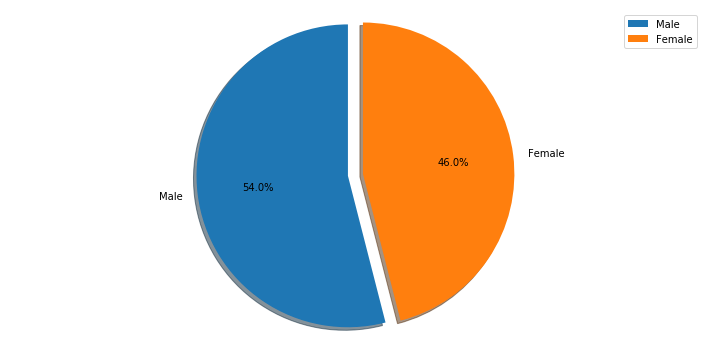

In [13]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(BA['GENDER'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

#### Age

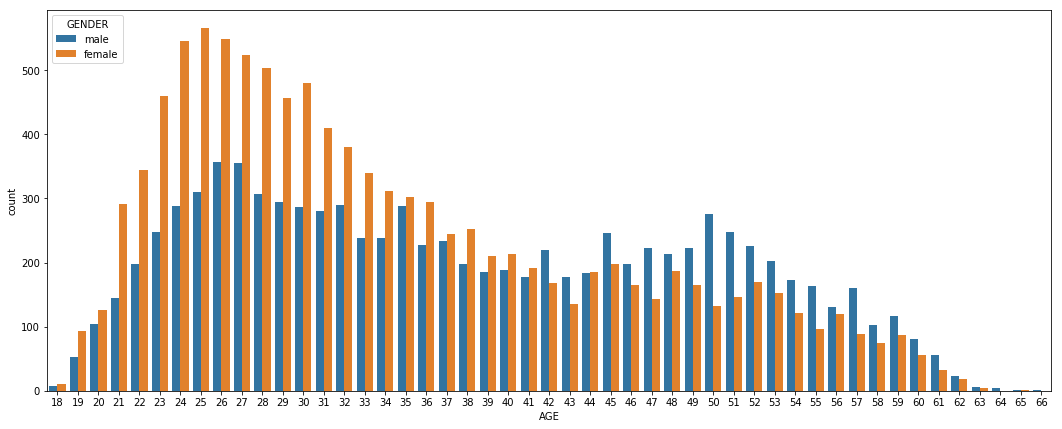

In [14]:
fig1, ax1 = plt.subplots(figsize=(18,7))
sns.countplot(BA['AGE'],hue=BA['GENDER'])

#### Position

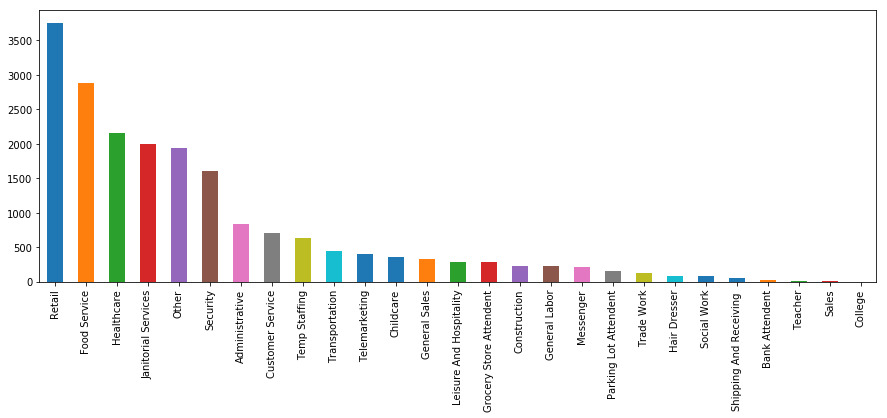

In [15]:
BA['POSITION'].value_counts().plot.bar(figsize=(15,5))

#### Education

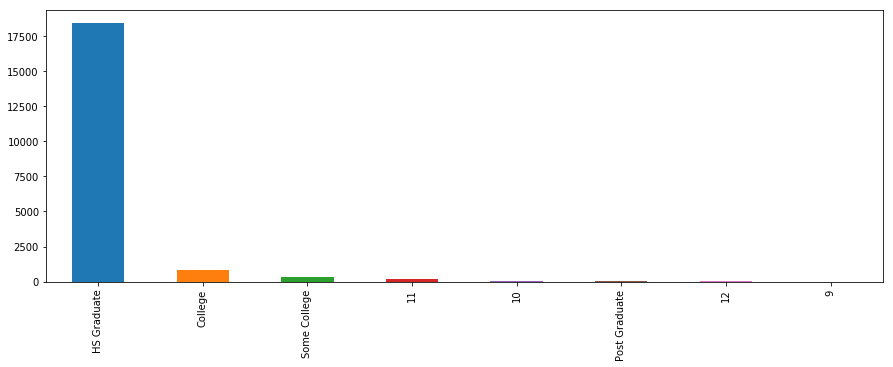

In [16]:
BA['EDUCATION'].value_counts().plot.bar(figsize=(15,5))

We can use below code to combine or groupby any variables to observe

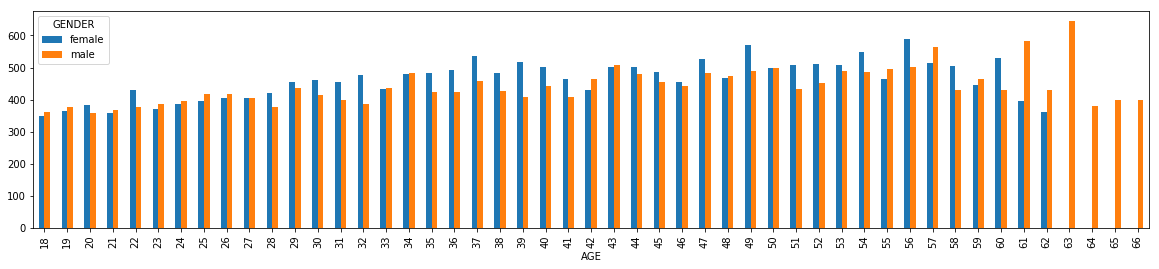

In [17]:
FT.pivot_table(values='TotalWages',index='AGE',columns='GENDER').plot.bar(figsize=(20,4))
#Full-time Total Wages per week

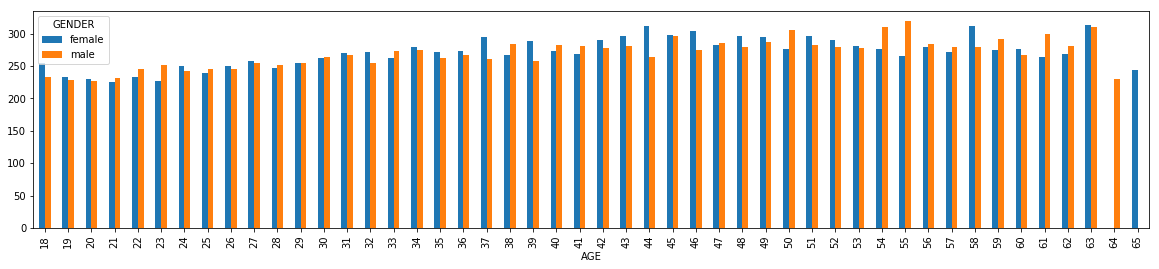

In [18]:
PT.pivot_table(values='TotalWages',index='AGE',columns='GENDER').plot.bar(figsize=(20,4))
# Part-time Total Wages per week

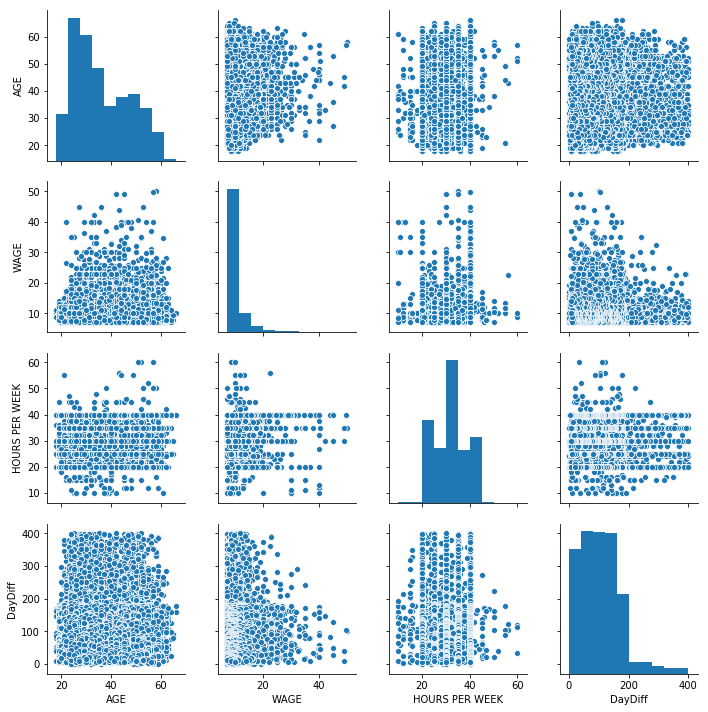

In [19]:
sns.pairplot(BA) 
# We can see the correltation between each variable. 
# It does not make sense as most of them are categorical data

## 1.2 K-Means

In [20]:
from sklearn.cluster import KMeans

In [21]:
X = PT[["WAGE","HOURS PER WEEK"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
kmeans.labels_
# We can determine it belongs to which group

array([2, 0, 2, ..., 1, 2, 0])

In [23]:
y_kmeans = kmeans.predict([[15.8, 20], [20, 40]])
y_kmeans
# We can predict it belongs to which group

array([1, 2])

In [24]:
kmeans.cluster_centers_

array([[ 8.99078275, 31.25124175],
       [ 9.0519841 , 22.09444444],
       [17.55978031, 31.40489914]])

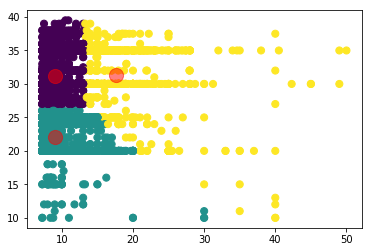

In [25]:
x = np.array(X)
y_kmeans = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##### In overall, K-means does not help us to do predictive data mining. Because we already have columns to seperate these data as different independent variables, we just show what we did. 



# 2. Predictive Data Mining

## 2.1 Prediction for Numerical Data

### 2.1.1 Full-Time DayDiff & Part-Time DayDiff

#### 2.1.1 a) Linear Regression

In [26]:
FT.head()

PID  AGE  GENDER PROGRAM START DATE        POSITION JOB START DATE  \
4   PID11335   40    male         2015-03-19  Administrative      2015/8/17   
9   PID01003   31  female         2014-01-08  Administrative       2014/5/8   
11  PID01004   31  female         2014-03-23  Administrative       2014/5/8   
19  PID19785   26  female         2015-06-15  Administrative      2015/7/17   
21  PID03444   37  female         2014-05-17  Administrative     2014/10/20   

     WAGE  HOURS PER WEEK    EDUCATION Quarter and Year JOB_START_DATE  \
4   13.92            40.0  HS Graduate          Q3-2015     2015-08-17   
9   12.00            40.0  HS Graduate          Q2-2014     2014-05-08   
11  12.00            40.0  HS Graduate          Q2-2014     2014-05-08   
19  10.00            40.0  HS Graduate          Q3-2015     2015-07-17   
21  13.00            40.0  HS Graduate          Q4-2014     2014-10-20   

    DayDiff  TotalWages  
4       151       556.8  
9       120       480.0  
11       46       480.0  
19       32       400.0  
21      156       520.0

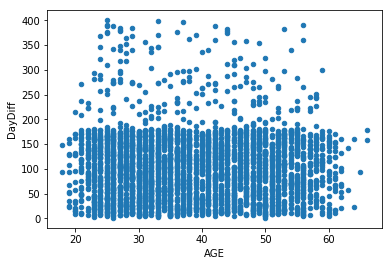

In [27]:
FT.plot.scatter(y='DayDiff',x='AGE')
# The relationship between age and daydiff is random

##### There is no need to show scatterplot for categorical data

In [28]:
import statsmodels.formula.api as smf

In [29]:
reg_DayDiff = smf.ols('DayDiff~ AGE + GENDER + EDUCATION + POSITION ',data=FT).fit()
print(reg_DayDiff.summary())

                            OLS Regression Results                            
Dep. Variable:                DayDiff   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.024
Date:                Thu, 16 May 2019   Prob (F-statistic):              0.430
Time:                        01:45:05   Log-Likelihood:                -18429.
No. Observations:                3276   AIC:                         3.693e+04
Df Residuals:                    3241   BIC:                         3.714e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

##### There is no linear regression as most of variable of p-value is very high. 

In [30]:
PT.head()

PID  AGE GENDER PROGRAM START DATE        POSITION JOB START DATE  \
0  PID02994   29   male         2015-06-24  Administrative       2015/9/3   
1  PID00542   50   male         2015-07-04  Administrative       2015/8/3   
2  PID03451   50   male         2014-08-29  Administrative       2015/9/8   
3  PID00543   50   male         2015-04-25  Administrative       2015/8/3   
5  PID05307   26   male         2015-04-05  Administrative      2015/9/16   

    WAGE  HOURS PER WEEK    EDUCATION Quarter and Year JOB_START_DATE  \
0  15.60            30.0  HS Graduate          Q3-2015     2015-09-03   
1   8.75            30.0  HS Graduate          Q3-2015     2015-08-03   
2  16.00            35.0  HS Graduate          Q3-2015     2015-09-08   
3   8.75            30.0  HS Graduate          Q3-2015     2015-08-03   
5  16.50            35.0  HS Graduate          Q3-2015     2015-09-16   

   DayDiff  TotalWages  
0       71       468.0  
1       30       262.5  
2      375       560.0  
3      100       262.5  
5      164       577.5

In [31]:
reg_DayDiff = smf.ols('DayDiff~ AGE + GENDER + EDUCATION + POSITION ',data=PT).fit()
print(reg_DayDiff.summary())

                            OLS Regression Results                            
Dep. Variable:                DayDiff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.476
Date:                Thu, 16 May 2019   Prob (F-statistic):             0.0365
Time:                        01:45:06   Log-Likelihood:                -94031.
No. Observations:               16613   AIC:                         1.881e+05
Df Residuals:                   16578   BIC:                         1.884e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

##### There is no linear relationship as most of variable of p-value is very high. 

##### Since there is no linear relationship between independent varibale and DayDiff, we will not show regression tree model either due to much weaker performance of regression tree if we use, as well as we will not show score of this model

### 2.1.2  Full-Time TotalWages 

#### 2.1.2 a) Linear Regression

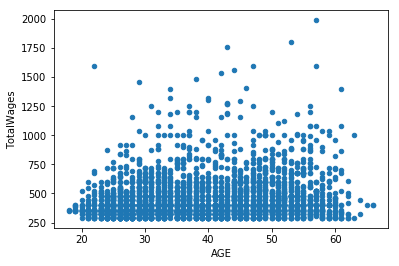

In [32]:
FT.plot.scatter(y='TotalWages',x='AGE')
# The relationship between age and Totalwages is random

In [33]:
reg_PTWages = smf.ols('TotalWages ~ AGE + GENDER + EDUCATION + POSITION ',data=FT).fit()
print(reg_PTWages.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalWages   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     52.86
Date:                Thu, 16 May 2019   Prob (F-statistic):          2.76e-280
Time:                        01:45:06   Log-Likelihood:                -20907.
No. Observations:                3276   AIC:                         4.188e+04
Df Residuals:                    3241   BIC:                         4.210e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

##### The P-value of Gender is very high, so we just remove this variable

In [34]:
reg_FTWages = smf.ols('TotalWages ~ AGE + EDUCATION + POSITION ',data=FT).fit()
print(reg_FTWages.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalWages   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     54.32
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.97e-280
Time:                        01:45:06   Log-Likelihood:                -20909.
No. Observations:                3276   AIC:                         4.189e+04
Df Residuals:                    3242   BIC:                         4.209e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

##### Education[11], Education[12], Education[HS Graduate], and Position[College] is not significant since p-value is very high.
##### Therefore, we can get that                                                                                                                                         PTWages = 2.0447* AGE - b1 * Position** - b2 * Education** + 519.8052 
##### Positon** and Education** are categorical data, so we need to match it with different coefficient. Also, for Education with 11,12, HS Graduate and Position with College, this regression has no effect.


In [35]:
from sklearn.linear_model import LinearRegression as reg
from patsy import dmatrices

In [36]:
y, X = dmatrices("TotalWages ~ AGE + POSITION + EDUCATION",data = FT)

In [37]:
reg().fit(X,y).score(X,y)

0.3560325587063272

#### 2.1.2 b) Regression Tree

In [38]:
Features1 = FT[["GENDER","POSITION","EDUCATION"]].values

In [39]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

encFeatures1 = enc.fit_transform(Features1).toarray()
encFeatures1 = pd.DataFrame(data=encFeatures1)
encFeatures1["AGE"] = list(FT["AGE"])
encFeatures1.head()

0    1    2    3    4    5    6    7    8    9 ...    27   28   29   30  \
0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    31   32   33   34   35  AGE  
0  0.0  0.0  1.0  0.0  0.0   40  
1  0.0  0.0  1.0  0.0  0.0   31  
2  0.0  0.0  1.0  0.0  0.0   31  
3  0.0  0.0  1.0  0.0  0.0   26  
4  0.0  0.0  1.0  0.0  0.0   37  

[5 rows x 37 columns]

In [40]:
TotalWages1 = FT[["TotalWages"]]

In [41]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(encFeatures1, TotalWages1, random_state=33)

In [42]:
from sklearn.tree import DecisionTreeRegressor
Reg_tree = DecisionTreeRegressor()

In [43]:
Reg_tree.fit(X_train1,y_train1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
X_test1.head()

0    1    2    3    4    5    6    7    8    9 ...    27   28   29  \
125   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
228   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2335  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
726   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
1113  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

       30   31   32   33   34   35  AGE  
125   0.0  0.0  0.0  1.0  0.0  0.0   44  
228   0.0  0.0  1.0  0.0  0.0  0.0   37  
2335  0.0  0.0  0.0  1.0  0.0  0.0   31  
726   0.0  0.0  0.0  1.0  0.0  0.0   30  
1113  0.0  0.0  0.0  1.0  0.0  0.0   53  

[5 rows x 37 columns]

In [45]:
Reg_tree.predict(X_test1)

array([ 880.        , 1125.        ,  372.22222222,  358.33333333,
        520.4       ,  495.06666667,  418.57142857,  720.        ,
        330.        ,  400.        ,  601.2       ,  382.        ,
        400.        ,  640.        ,  333.5       ,  574.8       ,
        345.        ,  410.        ,  314.44444444,  508.212     ,
        376.        ,  423.33333333,  540.        ,  448.57142857,
        448.        ,  842.        ,  400.        ,  500.        ,
        358.        ,  421.42857143,  350.        ,  360.        ,
        380.        ,  542.11428571,  550.        ,  372.22222222,
        960.        ,  448.88888889,  374.        ,  406.66666667,
        360.        ,  655.6       ,  429.11111111,  455.        ,
        326.66666667,  400.        ,  336.66666667,  440.        ,
        378.        ,  429.11111111,  420.        ,  740.        ,
        354.33333333,  660.        ,  444.66666667,  360.        ,
        480.        ,  420.        ,  426.        ,  373.33333

In [46]:
Reg_tree.score(X_test1,y_test1)

0.043898369897300005

In [47]:
scorelist_regFTW =[]
length_regFTW = len(scorelist_regFTW)

#use for loop to list 20 scores calculated randomly by regression tree
for length_regFTW in range(1,21):  
    from sklearn.tree import DecisionTreeRegressor
    Reg_tree_FTW = DecisionTreeRegressor()    
    Reg_tree_FTW.fit(X_train1,y_train1)

    scorelist_regFTW.append(Reg_tree_FTW.score(X_test1,y_test1))

In [48]:
scorelist_regFTW

[0.02752729284538813,
 0.027504220984649552,
 0.04343616980338283,
 0.030581158390299512,
 0.03711235093018316,
 0.03241609095969089,
 0.04135247378773898,
 0.036855294539211436,
 0.03173509927599494,
 0.05191293517345319,
 0.027425630345445984,
 0.050014027334125515,
 0.04014056870701155,
 0.03201723359999442,
 0.0314390576128335,
 0.03883903312691539,
 0.02679247456034861,
 0.020840042422896277,
 0.02843699775073938,
 0.029386589307524913]

In [49]:
#Compute average score
np.mean(scorelist_regFTW)

0.03428823707289141

##### For Full-Time TotalWages, we should use linear regression model as the score of linear regression (0.35603) is higher than the average score of regression tree (0.03236)

### When we have information of gender, age, position, and education, we can use multivariable linear regression model to predict wages for full-time employees. 

### 2.1.3  Part-Time TotalWages 

#### 2.1.3 a) Linear Regression

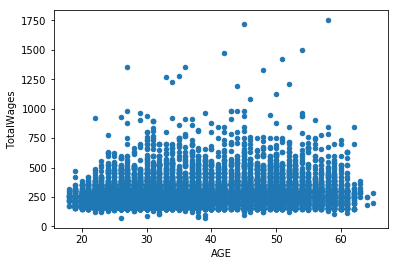

In [50]:
PT.plot.scatter(y='TotalWages',x='AGE')

In [51]:
reg_FTWages = smf.ols('TotalWages ~ AGE + GENDER + EDUCATION + POSITION ',data=PT).fit()
print(reg_FTWages.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalWages   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        01:45:08   Log-Likelihood:                -98238.
No. Observations:               16613   AIC:                         1.965e+05
Df Residuals:                   16578   BIC:                         1.968e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In



##### Education[9],Education[11], Education[12],Position[Teacher] is not significant since p-value is very high.
##### Therefore, we can get that                                                                                                                                         PTWages = 0.8990 * AGE + 3.0075 * Gender - b1 * Position** - b2 * Education** + 312.8936  
##### Positon** and Education** are categorical data, so we need to match it with different coefficient. Also, for Education with 9,11,12 and Position  with Teacher, this regression has no effect.

In [52]:
from sklearn.linear_model import LinearRegression as reg
from patsy import dmatrices

In [53]:
y, X = dmatrices("TotalWages ~ GENDER + AGE + POSITION + EDUCATION",data = PT)

In [54]:
reg().fit(X,y).score(X,y)

0.2207702619783588

#### 2.1.3 b) Regression Tree

In [55]:
Features11 = PT[["GENDER","POSITION","EDUCATION"]].values

In [56]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

encFeatures11 = enc.fit_transform(Features11).toarray()
encFeatures11 = pd.DataFrame(data=encFeatures11)
encFeatures11["AGE"] = list(PT["AGE"])
encFeatures11.head()

0    1    2    3    4    5    6    7    8    9 ...    27   28   29   30  \
0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    31   32   33   34   35  AGE  
0  0.0  0.0  1.0  0.0  0.0   29  
1  0.0  0.0  1.0  0.0  0.0   50  
2  0.0  0.0  1.0  0.0  0.0   50  
3  0.0  0.0  1.0  0.0  0.0   50  
4  0.0  0.0  1.0  0.0  0.0   26  

[5 rows x 37 columns]

In [57]:
TotalWages11 = PT[["TotalWages"]]

In [58]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(encFeatures11, TotalWages11, random_state=33)

In [59]:
from sklearn.tree import DecisionTreeRegressor
Reg_tree = DecisionTreeRegressor()

In [60]:
Reg_tree.fit(X_train11,y_train11)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
Reg_tree.predict(X_test11)

array([296.21428571, 231.58474576, 300.16578947, ..., 256.89864865,
       270.        , 248.33333333])

In [62]:
Reg_tree.score(X_test11,y_test11)

0.07937481714160155

In [63]:
scorelist_regPTW =[]
length_regPTW = len(scorelist_regPTW)

#use for loop to list 10 scores calculated randomly by regression tree
for length_regFTW in range(1,11):
    from sklearn.tree import DecisionTreeRegressor
    Reg_tree_PTW = DecisionTreeRegressor()    
    Reg_tree_PTW.fit(X_train11,y_train11)

    scorelist_regPTW.append(Reg_tree_PTW.score(X_test11,y_test11))

In [64]:
scorelist_regPTW 

[0.07934631995016694,
 0.08669430852120619,
 0.07825914764209674,
 0.07901581830750459,
 0.0788064435575816,
 0.07667102083053812,
 0.07785691672695771,
 0.07744153430913048,
 0.07903573359430072,
 0.07897350635520428]

In [65]:
#Compute average score
np.mean(scorelist_regPTW )

0.07921007497946873

##### For Part-Time TotalWages, we should use linear regression model as the score of linear regression (0.22077) is higher than the average score of regression tree (0.08243)

### When we have information of gender, age, position, and education, we can use multivariable linear regression model to predict wages for part-time employees.


##### For conclusion, we create a table for complete comparison of each Model for Numerical Data:

In [66]:
scoreTable = {'Linear Regression': [0.35603,0.22077],
'Regression Tree': [0.03236,0.08243]}
scoreTable = pd.DataFrame(scoreTable)
scoreTable["Prediction"] = list(["Full-Time TotalWages","Part-Time TotalWages"])
scoreTable = scoreTable.set_index("Prediction")
scoreTable.T

Prediction         Full-Time TotalWages  Part-Time TotalWages
Linear Regression               0.35603               0.22077
Regression Tree                 0.03236               0.08243

## 2.2 Prediction for Categorical Data  

##### There are 4 categorical data we can predict: Full-time Education, Full-time Position, Part-time Education, Part-time Position. Since the codes of Full-time Education and Part-time Education are almost the same, as well as the codes of Full-time Position and Part-time Position are almost the same, we just chose Full-time Education and Part-time Position as an illustration. 

### 2.2.1 Full-Time Education

#### 2.2.1 a) Logistic Regression

In [67]:
from sklearn.preprocessing import OneHotEncoder   # Use this one to transfer categorical data into dummy variable

In [68]:
Features2 = FT[["GENDER","POSITION"]].values
Features2

array([['male', 'Administrative'],
       ['female', 'Administrative'],
       ['female', 'Administrative'],
       ...,
       ['male', 'Transportation'],
       ['female', 'Transportation'],
       ['female', 'Transportation']], dtype=object)

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

encFeatures2 = enc.fit_transform(Features2).toarray()
encFeatures2 = pd.DataFrame(data=encFeatures2)
encFeatures2["AGE"] = list(FT["AGE"])
encFeatures2["TotalWages"] = list(FT["TotalWages"])
encFeatures2.head()

0    1    2    3    4    5    6    7    8    9     ...       21   22  \
0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
1  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
2  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
4  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   

    23   24   25   26   27   28  AGE  TotalWages  
0  0.0  0.0  0.0  0.0  0.0  0.0   40       556.8  
1  0.0  0.0  0.0  0.0  0.0  0.0   31       480.0  
2  0.0  0.0  0.0  0.0  0.0  0.0   31       480.0  
3  0.0  0.0  0.0  0.0  0.0  0.0   26       400.0  
4  0.0  0.0  0.0  0.0  0.0  0.0   37       520.0  

[5 rows x 31 columns]

In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(encFeatures2,FT["EDUCATION"], random_state=33)

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [72]:
log_reg.fit(X_train2, y_train2)

D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
X_test2.head()

0    1    2    3    4    5    6    7    8    9     ...       21   22  \
125   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
228   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
2335  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   
726   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     ...      0.0  0.0   
1113  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...      0.0  0.0   

       23   24   25   26   27   28  AGE  TotalWages  
125   0.0  0.0  0.0  0.0  0.0  0.0   44       590.0  
228   0.0  0.0  0.0  0.0  0.0  0.0   37       615.2  
2335  0.0  0.0  0.0  0.0  0.0  0.0   31       360.0  
726   0.0  0.0  0.0  0.0  0.0  0.0   30       420.0  
1113  0.0  0.0  0.0  0.0  0.0  0.0   53       600.0  

[5 rows x 31 columns]

In [74]:
log_reg.predict(X_test2)

array(['HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'College', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',

In [75]:
log_reg.score(X_test2, y_test2)

0.8937728937728938

In [76]:
scorelist_logregFTE =[]
length_logregFTE = len(scorelist_logregFTE)

#use for loop to list 10 scores calculated randomly by logistic regression
for length_logregFTE in range(1,11):
    from sklearn.linear_model import LogisticRegression
    log_regFTE = LogisticRegression(solver="lbfgs")    
    log_regFTE.fit(X_train2,y_train2)

    scorelist_logregFTE.append(log_regFTE.score(X_test2,y_test2))

D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Pyt

D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Python NYU\lib\site-packages\sklearn\linea

In [77]:
scorelist_logregFTE

[0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938,
 0.8937728937728938]

In [78]:
#Compute average score
np.mean(scorelist_logregFTE)

0.8937728937728938

##### Although there is no difference shown above , there is variation in score when we increase the run times in for loop. Therefore, for more accurate score, we can increase run time to at least 100. (Here is just for saving computation time)

#### 2.2.1 b) K-Nearest Neighbors

In [79]:
from sklearn import neighbors

In [80]:
# We aim to select optimal K value that yields the highest accuracy
# Assume the range of k is from 1 to 100 in integer
# Returns a sequence of integers for k from 1 to 100
k_FTE_range = range(1,101) 
scoresFTE_list=[]

for k in k_FTE_range:
    knnFTE = neighbors.KNeighborsClassifier(n_neighbors=k) 
    knnFTE.fit(X_train2, y_train2)
    
    scoresFTE_list.append(knnFTE.score(X_test2, y_test2))

Text(0, 0.5, 'Accuracy score')

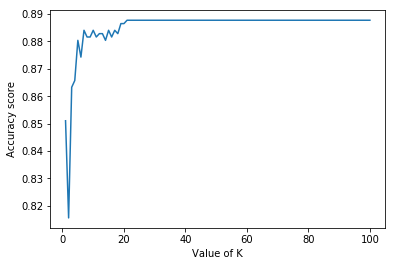

In [81]:
#Make a plot showing accuracy scores vs their corresponding k value
plt.plot(k_FTE_range,scoresFTE_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')

In [82]:
#Indexing the point with highest accuracy score, which also has the optimal k value selection
Accuracy_highest_FTE = max(scoresFTE_list)
K_HighestAccuracy_FTE = k_FTE_range[scoresFTE_list.index(Accuracy_highest_FTE)]
print ("Optimal K is",K_HighestAccuracy_FTE, "with highest accuracy =",Accuracy_highest_FTE)

Optimal K is 21 with highest accuracy = 0.8876678876678876


In [83]:
from sklearn import neighbors

knnFTE = neighbors.KNeighborsClassifier(n_neighbors=21)
knnFTE.fit(X_train2,y_train2)
knnFTE.predict(X_test2)
knnFTE.score(X_test2,y_test2)

0.8876678876678876

In [84]:
scorelistFTE =[]
lengthFTE = len(scorelistFTE)

for lengthFTE in range(1,11):
    from sklearn import neighbors
    knnFTE = neighbors.KNeighborsClassifier(n_neighbors=21)
    knnFTE.fit(X_train2,y_train2)

    scorelistFTE.append(knnFTE.score(X_test2,y_test2))

In [85]:
scorelistFTE

[0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876,
 0.8876678876678876]

In [86]:
np.mean(scorelistFTE)

0.8876678876678877

##### Although there is no difference shown above , there is variation in score when we increase the run times in for loop. Therefore, for more accurate score, we can increase run time to at least 100. (Here is just for saving computation time)

##### In some conditions, this score is high enough. However, if we want to let this model more accuracy, we can also normalize our data as z-score to manipulate.  

#### 2.2.1 c) Classification Tree
  

In [87]:
from sklearn.tree import DecisionTreeClassifier
Cat_tree_FTE = DecisionTreeClassifier()

In [88]:
Cat_tree_FTE.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
Cat_tree_FTE.predict(X_test2)

array(['HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'College', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'Some College', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'Post Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'College', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'College', 'HS Graduate', 'HS Graduate',
       'Some College', 'HS Graduate', 'HS Graduate', 'HS Graduate',
   

In [90]:
Cat_tree_FTE.score(X_test2,y_test2)

0.8302808302808303

In [91]:
scorelist_catFTE =[]
length_catFTE = len(scorelist_catFTE)

#use for loop to list 10 scores calculated randomly by categorical tree
for length_catFTE in range(1,11):
    from sklearn.tree import DecisionTreeClassifier
    Cat_tree_FTE = DecisionTreeClassifier()    
    Cat_tree_FTE.fit(X_train2,y_train2)

    scorelist_catFTE.append(Cat_tree_FTE.score(X_test2,y_test2))

In [92]:
scorelist_catFTE

[0.8302808302808303,
 0.8376068376068376,
 0.8290598290598291,
 0.8290598290598291,
 0.8315018315018315,
 0.8315018315018315,
 0.8327228327228328,
 0.8302808302808303,
 0.833943833943834,
 0.8290598290598291]

In [93]:
np.mean(scorelist_catFTE)

0.8315018315018315

#### 2.2.1 d) Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
randomforest_FTE = RandomForestClassifier()

In [95]:
randomforest_FTE.fit(X_train2,y_train2)

D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
randomforest_FTE.predict(X_test2)

array(['HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'College', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',
       'HS Graduate', 'HS Graduate', 'HS Graduate', 'HS Graduate',

In [97]:
randomforest_FTE.score(X_test2,y_test2)

0.8766788766788767

In [98]:
scorelist_ranFTE =[]
length_ranFTE = len(scorelist_ranFTE)

#use for loop to list 10 scores calculated randomly by randomforest
for length_ranFTE in range(1,11):
    from sklearn.ensemble import RandomForestClassifier
    randomforest_FTE = RandomForestClassifier()    
    randomforest_FTE.fit(X_train2,y_train2)
    
    scorelist_ranFTE.append(randomforest_FTE.score(X_test2,y_test2))

D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will ch

In [99]:
scorelist_ranFTE

[0.873015873015873,
 0.8717948717948718,
 0.8693528693528694,
 0.8669108669108669,
 0.8742368742368742,
 0.8681318681318682,
 0.8705738705738706,
 0.8681318681318682,
 0.8717948717948718,
 0.8717948717948718]

In [100]:
np.mean(scorelist_ranFTE)

0.8705738705738707

In [101]:
#Create a table for score comparison of different model of full time education
FscoreTable = {'Logistic Regression': [0.89377],
'K Nearest Neighbors': [0.88767],
'Classification Tree': [0.83040],
'Random Forest': [0.87082]}
FscoreTable = pd.DataFrame(FscoreTable)
FscoreTable["Prediction"] = list(["Full-Time Education"])
FscoreTable = FscoreTable.set_index("Prediction")
FscoreTable = FscoreTable.T
FscoreTable

Prediction           Full-Time Education
Logistic Regression              0.89377
K Nearest Neighbors              0.88767
Classification Tree              0.83040
Random Forest                    0.87082

#####  As we can see from above table, for Full-Time Education, we should choose Logistic Regression as the score of this model is the highest, compared to other three ones

##### Score Rank for Full Time Education: Logisctic Regression > KNN > Random Forest > Classification Tree

### When we have information of gender, age, position, and total wages, we can use logistic regression model to predict education for full-time employees. 

### 2.2.2 Part-Time Position

#### 2.2.2 a) Logistic Regression

In [102]:
Features22 = PT[["GENDER","EDUCATION"]].values
Features22

array([['male', 'HS Graduate'],
       ['male', 'HS Graduate'],
       ['male', 'HS Graduate'],
       ...,
       ['female', 'HS Graduate'],
       ['female', 'HS Graduate'],
       ['male', 'HS Graduate']], dtype=object)

In [103]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

encFeatures22 = enc.fit_transform(Features22).toarray()
encFeatures22 = pd.DataFrame(data=encFeatures22)
encFeatures22["AGE"] = list(PT["AGE"])
encFeatures22["TotalWages"] = list(PT["TotalWages"])
encFeatures22.head()

0    1    2    3    4    5    6    7    8    9  AGE  TotalWages
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   29       468.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   50       262.5
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   50       560.0
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   50       262.5
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   26       577.5

In [104]:
X_train22, X_test22, y_train22, y_test22 = train_test_split(encFeatures22,PT["POSITION"], random_state=33)

In [105]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [106]:
log_reg.fit(X_train22, y_train22)

D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
X_test22.head()

0    1    2    3    4    5    6    7    8    9  AGE  TotalWages
9864   1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   48       270.0
10584  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   29       300.0
14161  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   33       280.0
11206  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   21       176.0
3985   1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   37       160.0

In [108]:
log_reg.predict(X_test22)

array(['Healthcare', 'Food Service', 'Food Service', ..., 'Retail',
       'Janitorial Services', 'Healthcare'], dtype=object)

In [109]:
log_reg.score(X_test22, y_test22)

0.23182474723158403

In [110]:
scorelist_logregPTP =[]
length_logregPTP = len(scorelist_logregPTP)

#use for loop to list 10 scores calculated randomly by logistic regression
for length_logregPTP in range(1,11):
    from sklearn.linear_model import LogisticRegression
    log_regPTP = LogisticRegression()    
    log_regPTP.fit(X_train22,y_train22)

    scorelist_logregPTP.append(log_regPTP.score(X_test22, y_test22))

D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python NYU\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [111]:
scorelist_logregPTP

[0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403,
 0.23182474723158403]

In [112]:
np.mean(scorelist_logregPTP)

0.23182474723158406

#####  Although there is no difference shown above , there is variation in score when we increase the run times in for loop. Therefore, for more accurate score, we can increase run time to at least 100. (Here is just for saving computation time)

#### 2.2.2 b) K-Nearest Neighbors

In [113]:
from sklearn import neighbors

In [114]:
# We aim to select optimal K value that yields the highest accuracy
# Assume the range of k is from 1 to 100 in integer
# Returns a sequence of integers for k from 1 to 100
k_PTP_range = range(1,101) 
scoresPTP_list=[]

#Here we use the same splitted data from Logistic Regression Part Time Position Part
for k in k_PTP_range:
    knnPTP = neighbors.KNeighborsClassifier(n_neighbors=k) 
    knnPTP.fit(X_train22, y_train22)
      
    scoresPTP_list.append(knnPTP.score(X_test22, y_test22))

Text(0, 0.5, 'Accuracy score')

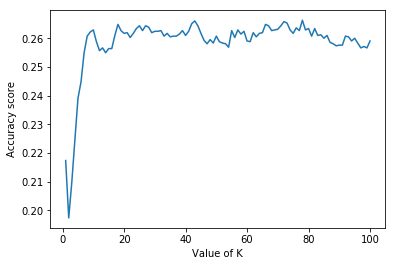

In [115]:
#Make a plot showing accuracy scores vs their corresponding k value
plt.plot(k_PTP_range,scoresPTP_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')

In [116]:
#Select optimal k value
Accuracy_highest_PTP = max(scoresPTP_list)
K_HighestAccuracy_PTP = k_PTP_range[scoresPTP_list.index(Accuracy_highest_PTP)]
print ("Optimal K is",K_HighestAccuracy_PTP, "with highest accuracy =",Accuracy_highest_PTP)

Optimal K is 78 with highest accuracy = 0.26624939817043813


In [117]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=78)

In [118]:
knn.fit(X_train22,y_train22)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=78, p=2,
           weights='uniform')

In [119]:
knn.predict(X_test22)

array(['Food Service', 'Food Service', 'Food Service', ...,
       'Food Service', 'Food Service', 'Retail'], dtype=object)

In [120]:
knn.score(X_test22,y_test22)

0.26624939817043813

In [121]:
scorelistPTP =[]
lengthPTP = len(scorelistPTP)

#Use a for loop to list 10 scores calculated randomly by knn 
for lengthPTP in range(1,11):
    from sklearn import neighbors
    knnPTP = neighbors.KNeighborsClassifier(n_neighbors=78)
    knnPTP.fit(X_train22,y_train22)

    scorelistPTP.append(knnPTP.score(X_test22,y_test22))

In [122]:
scorelistPTP

[0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813,
 0.26624939817043813]

In [123]:
#Compute average score
np.mean(scorelistPTP)

0.26624939817043813

##### Although there is no difference shown above , there is variation in score when we increase the run times in for loop. Therefore, for more accurate score, we can increase run time to at least 100. (Here is just for saving computation time)

##### In some conditions, this score is high enough. However, if we want to let this model more accuracy, we can also normalize our data as z-score to manipulate.  

#### 2.2.2 c) Classification Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
Cat_tree = DecisionTreeClassifier()

In [125]:
Cat_tree.fit(X_train22,y_train22)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
Cat_tree.predict(X_test22)

array(['Leisure And Hospitality', 'Other', 'Retail', ..., 'Food Service',
       'Janitorial Services', 'Telemarketing'], dtype=object)

In [127]:
Cat_tree.score(X_test22,y_test22)

0.2676937891189215

In [128]:
scorelist_catPTP =[]
length_catPTP = len(scorelist_catPTP)

#use for loop to list 10 scores calculated randomly by categorical tree
for length_catPTP in range(1,11):
    from sklearn.tree import DecisionTreeClassifier
    Cat_tree_PTP = DecisionTreeClassifier()    
    Cat_tree_PTP.fit(X_train22,y_train22)

    scorelist_catPTP.append(Cat_tree_PTP.score(X_test22,y_test22))

In [129]:
scorelist_catPTP

[0.2698603755416466,
 0.268175252768416,
 0.26937891189215213,
 0.2691381800674049,
 0.2696196437168994,
 0.2667308618199326,
 0.26937891189215213,
 0.2674530572941743,
 0.2676937891189215,
 0.26841598459316324]

In [130]:
np.mean(scorelist_catPTP)

0.2685844968704863

#### 2.2.2 d) Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()

In [132]:
randomforest.fit(X_train22,y_train22)

D:\Python NYU\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
randomforest.predict(X_test22)

array(['Leisure And Hospitality', 'Other', 'Retail', ..., 'Food Service',
       'Telemarketing', 'Telemarketing'], dtype=object)

In [134]:
randomforest.score(X_test22,y_test22)

0.2563793933558016

In [135]:
scorelist_ranPTP =[]
length_ranPTP = len(scorelist_ranPTP)

#use for loop to list 10 scores calculated randomly by randomforest
for length_ranPTP in range(1,11):
    from sklearn.ensemble import RandomForestClassifier
    randomforest_PTP = RandomForestClassifier(n_estimators = 10)    
    randomforest_PTP.fit(X_train22,y_train22)

    scorelist_ranPTP.append(randomforest_PTP.score(X_test22,y_test22))

In [136]:
scorelist_ranPTP

[0.25252768415984594,
 0.25589792970630715,
 0.25493500240731826,
 0.2623976889744824,
 0.2522869523350987,
 0.2537313432835821,
 0.2590274434280212,
 0.25180548868560426,
 0.2616754935002407,
 0.2621569571497352]

In [137]:
#Compute average score
np.mean(scorelist_ranPTP)

0.25664419836302355

In [138]:
#Create a table for score comparison of different model of part time position
PscoreTable = {'Logistic Regression': [0.23279],
'K Nearest Neighbors': [0.26625],
'Classification Tree': [0.26844],
'Random Forest': [0.25867]}
PscoreTable = pd.DataFrame(PscoreTable)
PscoreTable["Prediction"] = list(["Part-Time Position"])
PscoreTable = PscoreTable.set_index("Prediction")
PscoreTable = PscoreTable.T
PscoreTable

Prediction           Part-Time Position
Logistic Regression             0.23279
K Nearest Neighbors             0.26625
Classification Tree             0.26844
Random Forest                   0.25867

##### As we can see from above table, for Part-Time Position, we should choose Classification Tree as the score of this model is the highest, compared to other three ones

##### Score Rank for Part Time Position: Classfication Tree > KNN > Random Forest > Logistic Regression

### When we have information of gender, age, education, and total wages, we can use logistic regression model to predict position for part-time employees. 

# 3. Overall Conclusion

## 3.1 Numerical Data - Regression

#### For Full-time Total Wages, we should use Linear Regression model as the score of Linear Regression (0.35603) is higher than the average score of Regression Tree (0.03236). When we have information of gender, age, position, and education, we can use Multivariable Linear Regression model to predict wages for full-time employees.

#### For Part-Time TotalWages, we should use Linear Regression model as the score of Linear Regression (0.22077) is higher than the average score of Regression Tree (0.08243). When we have information of gender, age, position, and education, we can use Multivariable Linear Regression model to predict wages for part-time employees.

##### For conclusion, we create a table for complete comparison of each Model for Numerical Data:

In [139]:
scoreTable = {'Linear Regression': [0.35603,0.22077],
'Regression Tree': [0.03236,0.08243]}
scoreTable = pd.DataFrame(scoreTable)
scoreTable["Prediction"] = list(["Full-Time TotalWages","Part-Time TotalWages"])
scoreTable = scoreTable.set_index("Prediction")
scoreTable = scoreTable.T
scoreTable

Prediction         Full-Time TotalWages  Part-Time TotalWages
Linear Regression               0.35603               0.22077
Regression Tree                 0.03236               0.08243

## 3.2 Categorical Data - Classification

#### For Full-Time Education, we should choose Logistic Regression as the score of this model is the highest, compared to other three ones.When we have information of gender, age, position, and total wages, we can use Logistic Regression model to predict education for full-time employees.

#### For Part-Time Position, we should choose Classification Tree as the score of this model is the highest, compared to other three ones.When we have information of gender, age, education, and total wages, we can use Classification Tree model to predict position for part-time employees.

##### For conclusion, we create a table for complete comparison of each Model for Categorical Data:

In [140]:
PscoreTable = pd.DataFrame(data=PscoreTable)
PscoreTable = PscoreTable.reset_index()
FscoreTable = pd.DataFrame(data=FscoreTable)
FscoreTable = FscoreTable.reset_index()

In [141]:
Table = PscoreTable.merge(FscoreTable,on='index',how='inner')
Table.set_index("index")

Prediction           Part-Time Position  Full-Time Education
index                                                       
Logistic Regression             0.23279              0.89377
K Nearest Neighbors             0.26625              0.88767
Classification Tree             0.26844              0.83040
Random Forest                   0.25867              0.87082